In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
from numpy.random import choice

import nltk
from nltk.corpus import stopwords as nltk_stopwords

from sklearn.model_selection import train_test_split

from os.path import join
from glob import glob

import preprocessing_tools as pt
from tqdm import tqdm_notebook as tqdm

import pickle

from os import mkdir 
from shutil import move

In [2]:
data_path = 'data'

template = join(data_path,'*.txt')
filenames = glob(template)
print(len(filenames))

3684


In [3]:
texts_lens = []
for name in tqdm(filenames):
    with open(name, 'r') as f:
        text = f.read()
        tok_text = nltk.word_tokenize(text)
        tok_text = pt.normalize(tok_text, tokenized=True)
        texts_lens.append(len(tok_text))

KeyboardInterrupt: 

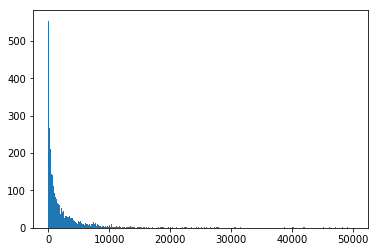

In [5]:
plt.hist(texts_lens, bins=[i * 100 for i in range(int(50000/100))])
plt.show()

In [6]:
texts_lens = np.array(texts_lens)
small_texts_mask = texts_lens < 100
small_texts_names = np.array(filenames)[small_texts_mask]

small_texts_dir = join(data_path, 'small_texts')
mkdir(small_texts_dir)

for name in small_texts_names:
    filename = name.split('/')[-1]
    dst = join(small_texts_dir, filename)
    move(name, dst)

In [14]:
with open('stopwords_updated.pkl', 'rb') as f:
    words = pickle.load(f)
    words = [word.strip() for word in words]
    extra_stopwords.update(set(words))

stopwords = set()
stopwords.update(set(nltk_stopwords.words('english')))
stopwords.update(set(nltk_stopwords.words('russian')))
stopwords.update(extra_stopwords)

custom_stopwords = set(['http', 'https', 'ru', 'com', 'vk',
                         'привет', 'здравствуйте', 'например', 'репост','лс','это','очень','женщина','мужчина','человек'])

stopwords.update(custom_stopwords)
stopwords = list(stopwords)
print('Total numver of stopwords:', len(stopwords))

with open('stopwords.pkl', 'wb') as f:
    pickle.dump(stopwords, f)

Total numver of stopwords: 364


In [14]:
template = join(data_path,'*.txt')
filenames = glob(template)
train_names, test_names = train_test_split(filenames, test_size=0.1, random_state=666)
print(len(train_names), len(test_names))

3314 369


In [15]:
with open('train_names.pkl', 'wb') as f:
    pickle.dump(train_names, f)
    
with open('test_names.pkl', 'wb') as f:
    pickle.dump(test_names, f)    